
# Task 1- Feature Selection

## author: Berfin Duman
April 3, 2023

---

Adding neccesary libraries below:

In [64]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats as stats
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.feature_selection import SequentialFeatureSelector
from mlxtend.feature_selection import ExhaustiveFeatureSelector as EFS
from statsmodels.stats.outliers_influence import variance_inflation_factor

## Data Decription

- First of all I have to say that I tried a lot of data, but decided that winequality-white.csv was the most suitable for evaluation. However, until the end of the assignment, I was thinking whether the dataset I chose was good, so I tried to make the homework independent of the dataset as much as possible until the Feature Scaling part and paid attention to its functionality.

## Winequality White Dataset

- The dataset are related to white variant of the Portuguese "Vinho Verde" wine.
- These datasets can be viewed as classification or regression tasks.


The dataset consists of 11 numeric features and 1 target variable class: 
1.  fixed acidity
2.  volatile acidity
3.  citric acid
4.  residual sugar
5.  chlorides
6.  free sulfur dioxide
7. total sulfur dioxide
8.  density
9.  pH
10. sulphates
11. alcohol
Output variable (based on sensory data):
12. quality (score between 0 and 10)

In [181]:
!ls 
#actually with this code you can run other dataset in folder like :
#winequality-red.csv, winequality-white.csv, auto-mpg.csv

AirQuality.csv
Question_I.ipynb
Question_II.ipynb
README.md
auto-mpg.csv
auto-mpg.data
flagged
insurance.csv
train.csv
winequality-red.csv
winequality-white.csv


In [25]:
df=pd.read_csv("../datasets/winequality-white.csv",sep=";")

I did some analysis for the dataset I chose below:

In [26]:
df.head() #return first 5 rows in dataset:

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [27]:
df.tail() #return last 5 rows in dataset:

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7
4897,6.0,0.21,0.38,0.8,0.020,22.0,98.0,0.98941,3.26,0.32,11.8,6


In [28]:
df.columns #return column names:

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [29]:
df.shape #return dimension of dataset: 

(4898, 12)

In [30]:
df.info()
#return some infos about dataset like non-null count and dtype of columns
#there are no null values in our dataset-> Analyze this

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


In [31]:
df.isnull() 
#returns null by traversing all elements in the dataset.  If element is null return True else False: 

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,False,False,False,False,False,False,False,False,False,False,False,False
4894,False,False,False,False,False,False,False,False,False,False,False,False
4895,False,False,False,False,False,False,False,False,False,False,False,False
4896,False,False,False,False,False,False,False,False,False,False,False,False


In [32]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [33]:
location=round(df.describe(),4) #.describe() function provides Measures of Location like count, mean,min, Q1, Q2, Q3, max values of data.
location

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.0000,4898.0000,4898.0000,4898.0000,4898.0000,4898.0000,4898.0000,4898.0000,4898.0000,4898.0000,4898.0000,4898.0000
mean,6.8548,0.2782,0.3342,6.3914,0.0458,35.3081,138.3607,0.9940,3.1883,0.4898,10.5143,5.8779
std,0.8439,0.1008,0.1210,5.0721,0.0218,17.0071,42.4981,0.0030,0.1510,0.1141,1.2306,0.8856
min,3.8000,0.0800,0.0000,0.6000,0.0090,2.0000,9.0000,0.9871,2.7200,0.2200,8.0000,3.0000
25%,6.3000,0.2100,0.2700,1.7000,0.0360,23.0000,108.0000,0.9917,3.0900,0.4100,9.5000,5.0000
50%,6.8000,0.2600,0.3200,5.2000,0.0430,34.0000,134.0000,0.9937,3.1800,0.4700,10.4000,6.0000
75%,7.3000,0.3200,0.3900,9.9000,0.0500,46.0000,167.0000,0.9961,3.2800,0.5500,11.4000,6.0000
max,14.2000,1.1000,1.6600,65.8000,0.3460,289.0000,440.0000,1.0390,3.8200,1.0800,14.2000,9.0000


In [34]:
location.loc["IQR"]= location.loc["75%"]-location.loc["25%"] 
#I added value of Interquartile range (IQR). IQR is one of the measures of spread.
location

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.0000,4898.0000,4898.0000,4898.0000,4898.0000,4898.0000,4898.0000,4898.0000,4898.0000,4898.0000,4898.0000,4898.0000
mean,6.8548,0.2782,0.3342,6.3914,0.0458,35.3081,138.3607,0.9940,3.1883,0.4898,10.5143,5.8779
std,0.8439,0.1008,0.1210,5.0721,0.0218,17.0071,42.4981,0.0030,0.1510,0.1141,1.2306,0.8856
min,3.8000,0.0800,0.0000,0.6000,0.0090,2.0000,9.0000,0.9871,2.7200,0.2200,8.0000,3.0000
25%,6.3000,0.2100,0.2700,1.7000,0.0360,23.0000,108.0000,0.9917,3.0900,0.4100,9.5000,5.0000
50%,6.8000,0.2600,0.3200,5.2000,0.0430,34.0000,134.0000,0.9937,3.1800,0.4700,10.4000,6.0000
75%,7.3000,0.3200,0.3900,9.9000,0.0500,46.0000,167.0000,0.9961,3.2800,0.5500,11.4000,6.0000
max,14.2000,1.1000,1.6600,65.8000,0.3460,289.0000,440.0000,1.0390,3.8200,1.0800,14.2000,9.0000
IQR,1.0000,0.1100,0.1200,8.2000,0.0140,23.0000,59.0000,0.0044,0.1900,0.1400,1.9000,1.0000


In [35]:
location.loc["critic_point_max"]=location.loc["75%"]+ 1.5+(location.loc["IQR"])
location.loc["critic_point_min"]=location.loc["25%"]-1.5+(location.loc["IQR"])
#I calculated the critical max and min values to calculate the outlier using the IQR value. 
#This will give us information about the outlier as mentioned in lect 2
location

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.0000,4898.0000,4898.0000,4898.0000,4898.0000,4898.0000,4898.0000,4898.0000,4898.0000,4898.0000,4898.0000,4898.0000
mean,6.8548,0.2782,0.3342,6.3914,0.0458,35.3081,138.3607,0.9940,3.1883,0.4898,10.5143,5.8779
std,0.8439,0.1008,0.1210,5.0721,0.0218,17.0071,42.4981,0.0030,0.1510,0.1141,1.2306,0.8856
min,3.8000,0.0800,0.0000,0.6000,0.0090,2.0000,9.0000,0.9871,2.7200,0.2200,8.0000,3.0000
25%,6.3000,0.2100,0.2700,1.7000,0.0360,23.0000,108.0000,0.9917,3.0900,0.4100,9.5000,5.0000
50%,6.8000,0.2600,0.3200,5.2000,0.0430,34.0000,134.0000,0.9937,3.1800,0.4700,10.4000,6.0000
75%,7.3000,0.3200,0.3900,9.9000,0.0500,46.0000,167.0000,0.9961,3.2800,0.5500,11.4000,6.0000
max,14.2000,1.1000,1.6600,65.8000,0.3460,289.0000,440.0000,1.0390,3.8200,1.0800,14.2000,9.0000
IQR,1.0000,0.1100,0.1200,8.2000,0.0140,23.0000,59.0000,0.0044,0.1900,0.1400,1.9000,1.0000
critic_point_max,9.8000,1.9300,2.0100,19.6000,1.5640,70.5000,227.5000,2.5005,4.9700,2.1900,14.8000,8.5000


In [36]:
print("Number of samples: ",df.shape[0])
for i in range(len(df.columns)):
    print(df.columns[i].upper()+":")
    print("Number of unique value: ",len(df[df.columns[i]].unique()))
    a=df[(df[df.columns[i]]>location.loc["critic_point_max"][i]) | (df[df.columns[i]]<location.loc["critic_point_min"][i])]
    print("number of outlier: ", len(a))
    print("---------------")
#As I mentioned above, I calculated the outlier of each feature.

Number of samples:  4898
FIXED ACIDITY:
Number of unique value:  68
number of outlier:  362
---------------
VOLATILE ACIDITY:
Number of unique value:  125
number of outlier:  0
---------------
CITRIC ACID:
Number of unique value:  87
number of outlier:  0
---------------
RESIDUAL SUGAR:
Number of unique value:  310
number of outlier:  3406
---------------
CHLORIDES:
Number of unique value:  160
number of outlier:  0
---------------
FREE SULFUR DIOXIDE:
Number of unique value:  132
number of outlier:  3658
---------------
TOTAL SULFUR DIOXIDE:
Number of unique value:  251
number of outlier:  3719
---------------
DENSITY:
Number of unique value:  890
number of outlier:  0
---------------
PH:
Number of unique value:  103
number of outlier:  0
---------------
SULPHATES:
Number of unique value:  79
number of outlier:  0
---------------
ALCOHOL:
Number of unique value:  103
number of outlier:  1814
---------------
QUALITY:
Number of unique value:  7
number of outlier:  188
---------------


In [37]:
for i in range(len(df.columns)):
    #print(stats.describe(df[column_list[i]]))
    print(df.columns[i].upper()+":")
    print('Mean=%.4f, Median=%.4f'% (np.mean(df[df.columns[i]]), np.median(df[df.columns[i]])))
    try:
        data_bc, lam = stats.boxcox(df[df.columns[i]])
        print('λ = %.4f' % (lam));
        # Normal dağılım testi yap
        k2, p = stats.normaltest(data_bc)

        if p < 0.05:
            print("Data is NOT normally distributed")
        else:
            print("Data is normally distributed")
    except:
        print(df.columns[i],"'s colum included negative values'!!!")
    print("---------------")

FIXED ACIDITY:
Mean=6.8548, Median=6.8000
λ = -0.1541
Data is NOT normally distributed
---------------
VOLATILE ACIDITY:
Mean=0.2782, Median=0.2600
λ = -0.1192
Data is NOT normally distributed
---------------
CITRIC ACID:
Mean=0.3342, Median=0.3200
citric acid 's colum included negative values'!!!
---------------
RESIDUAL SUGAR:
Mean=6.3914, Median=5.2000
λ = 0.1245
Data is NOT normally distributed
---------------
CHLORIDES:
Mean=0.0458, Median=0.0430
λ = -0.4832
Data is NOT normally distributed
---------------
FREE SULFUR DIOXIDE:
Mean=35.3081, Median=34.0000
λ = 0.4906
Data is NOT normally distributed
---------------
TOTAL SULFUR DIOXIDE:
Mean=138.3607, Median=134.0000
λ = 0.6575
Data is NOT normally distributed
---------------
DENSITY:
Mean=0.9940, Median=0.9937
λ = -54.9670
Data is NOT normally distributed
---------------
PH:
Mean=3.1883, Median=3.1800
λ = -1.9868
Data is normally distributed
---------------
SULPHATES:
Mean=0.4898, Median=0.4700
λ = -0.3394
Data is normally distrib

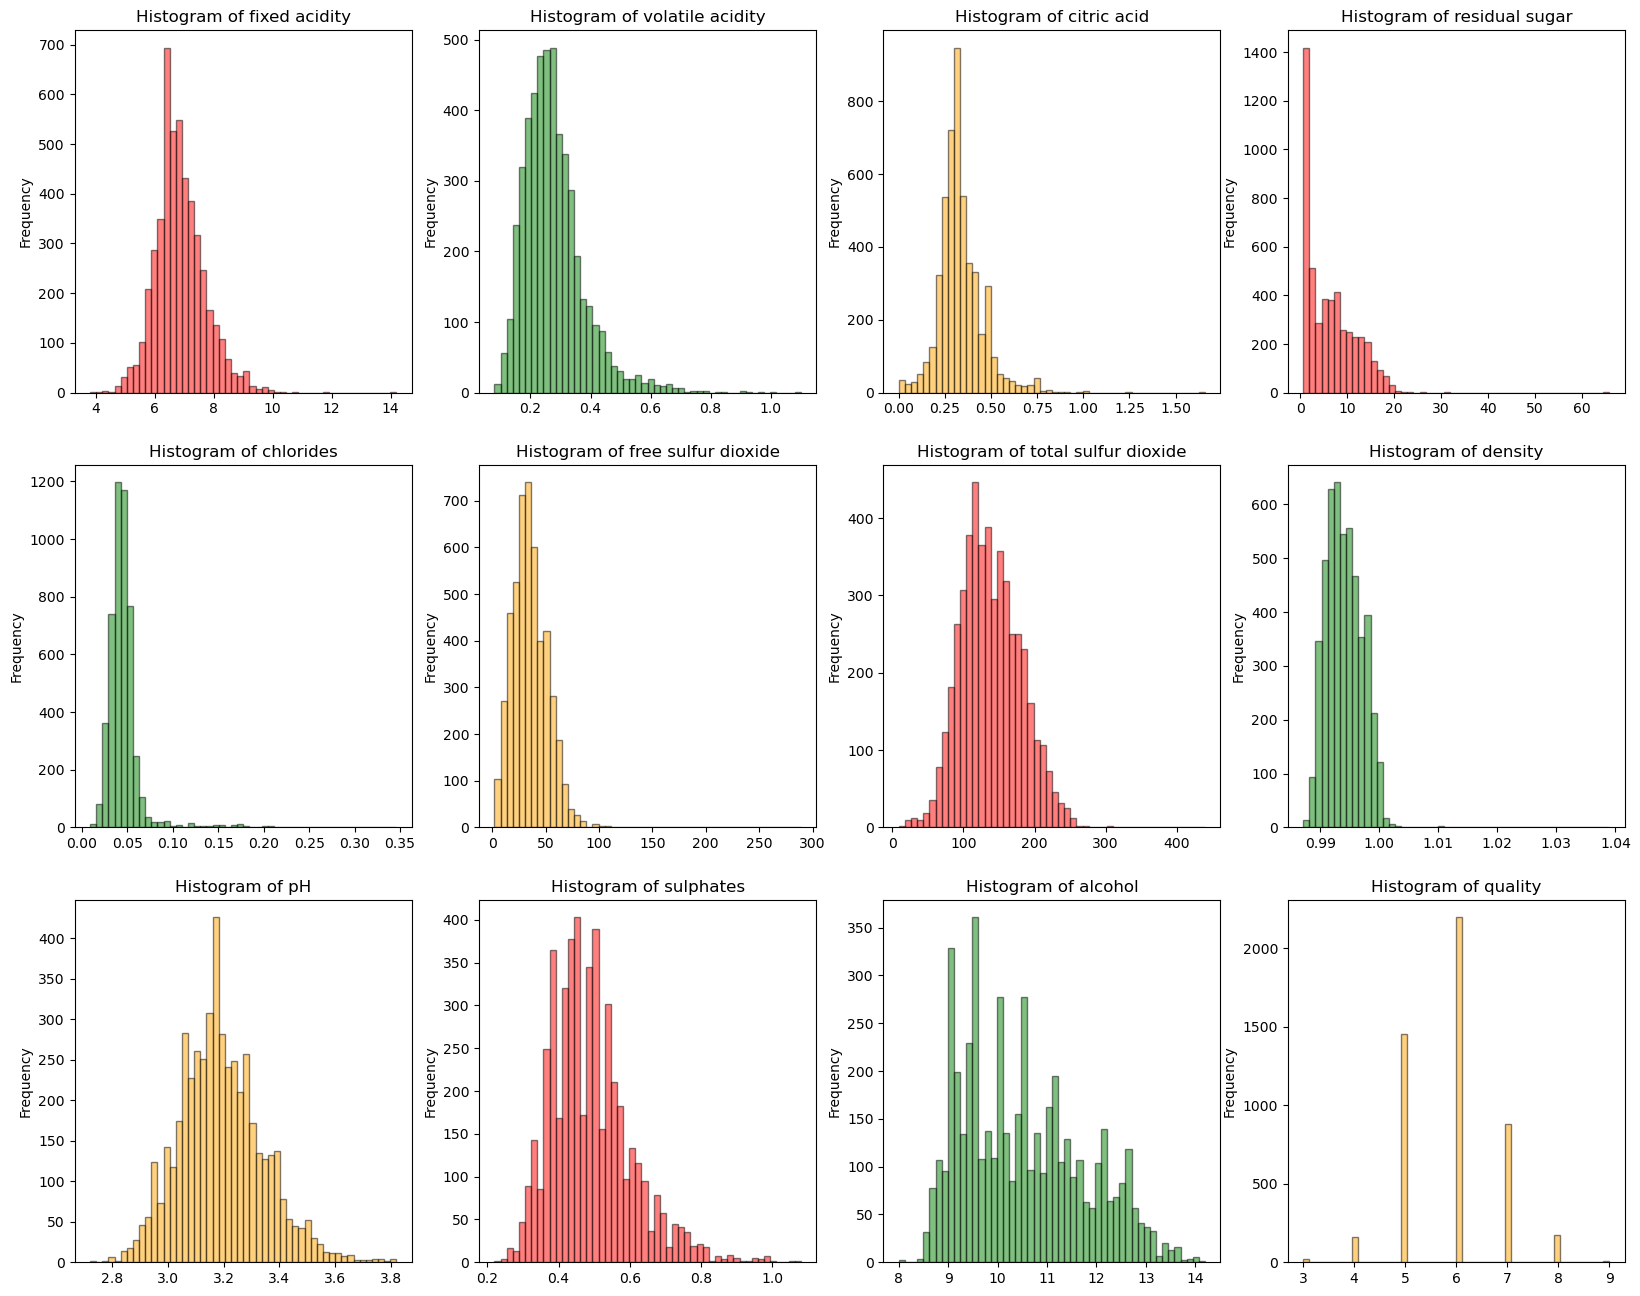

In [38]:
#get the histogram of the data
colors = ['red', 'green', 'orange']*4
len(colors)
figure, axs = plt.subplots(3,4, figsize = (20,16))
n_bins = 50
for i, item in enumerate(axs.reshape(-1)):
    item.hist(df[df.columns[i]], color = colors[i], bins = n_bins, alpha = 0.5, edgecolor = 'black')
    item.set_title(f"Histogram of {df.columns[i]}")
    item.set_ylabel("Frequency")

plt.show()

In [39]:
check_corr = round(df.corr(),4)
check_corr

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.0000,-0.0227,0.2892,0.0890,0.0231,-0.0494,0.0911,0.2653,-0.4259,-0.0171,-0.1209,-0.1137
volatile acidity,-0.0227,1.0000,-0.1495,0.0643,0.0705,-0.0970,0.0893,0.0271,-0.0319,-0.0357,0.0677,-0.1947
citric acid,0.2892,-0.1495,1.0000,0.0942,0.1144,0.0941,0.1211,0.1495,-0.1637,0.0623,-0.0757,-0.0092
residual sugar,0.0890,0.0643,0.0942,1.0000,0.0887,0.2991,0.4014,0.8390,-0.1941,-0.0267,-0.4506,-0.0976
chlorides,0.0231,0.0705,0.1144,0.0887,1.0000,0.1014,0.1989,0.2572,-0.0904,0.0168,-0.3602,-0.2099
free sulfur dioxide,-0.0494,-0.0970,0.0941,0.2991,0.1014,1.0000,0.6155,0.2942,-0.0006,0.0592,-0.2501,0.0082
total sulfur dioxide,0.0911,0.0893,0.1211,0.4014,0.1989,0.6155,1.0000,0.5299,0.0023,0.1346,-0.4489,-0.1747
density,0.2653,0.0271,0.1495,0.8390,0.2572,0.2942,0.5299,1.0000,-0.0936,0.0745,-0.7801,-0.3071
pH,-0.4259,-0.0319,-0.1637,-0.1941,-0.0904,-0.0006,0.0023,-0.0936,1.0000,0.1560,0.1214,0.0994
sulphates,-0.0171,-0.0357,0.0623,-0.0267,0.0168,0.0592,0.1346,0.0745,0.1560,1.0000,-0.0174,0.0537


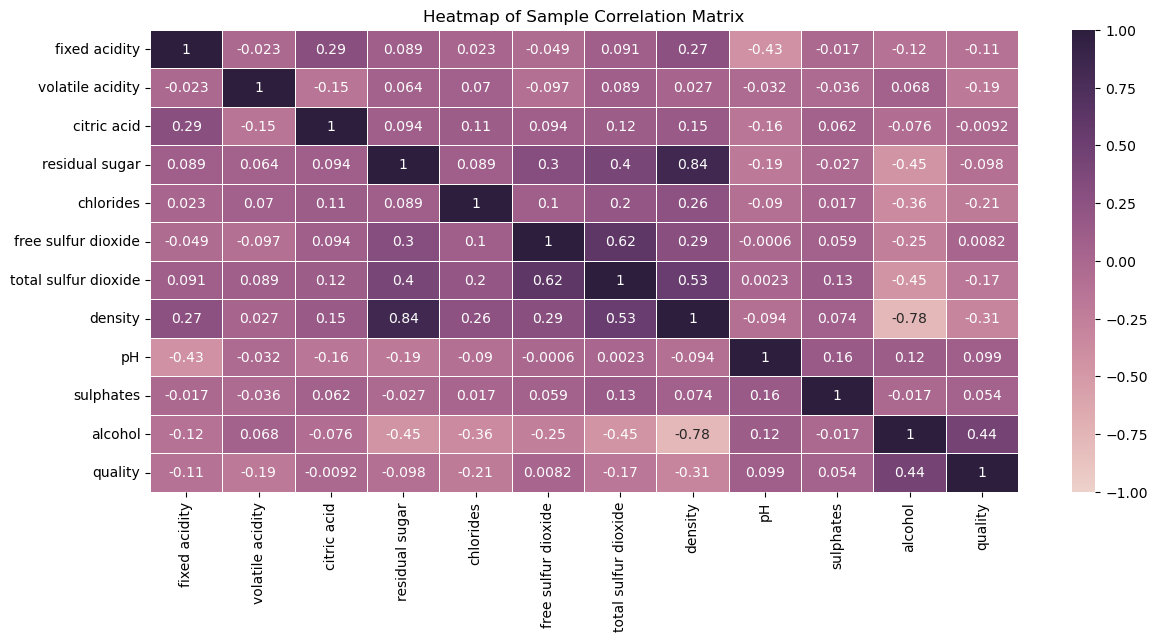

In [40]:
plt.rcParams['figure.figsize'] = [14, 6]

sns.heatmap(check_corr,  cmap=sns.cubehelix_palette(as_cmap=True), annot=True, vmin=-1, vmax=1,linewidth=.5)
plt.title('Heatmap of Sample Correlation Matrix')
plt.show();

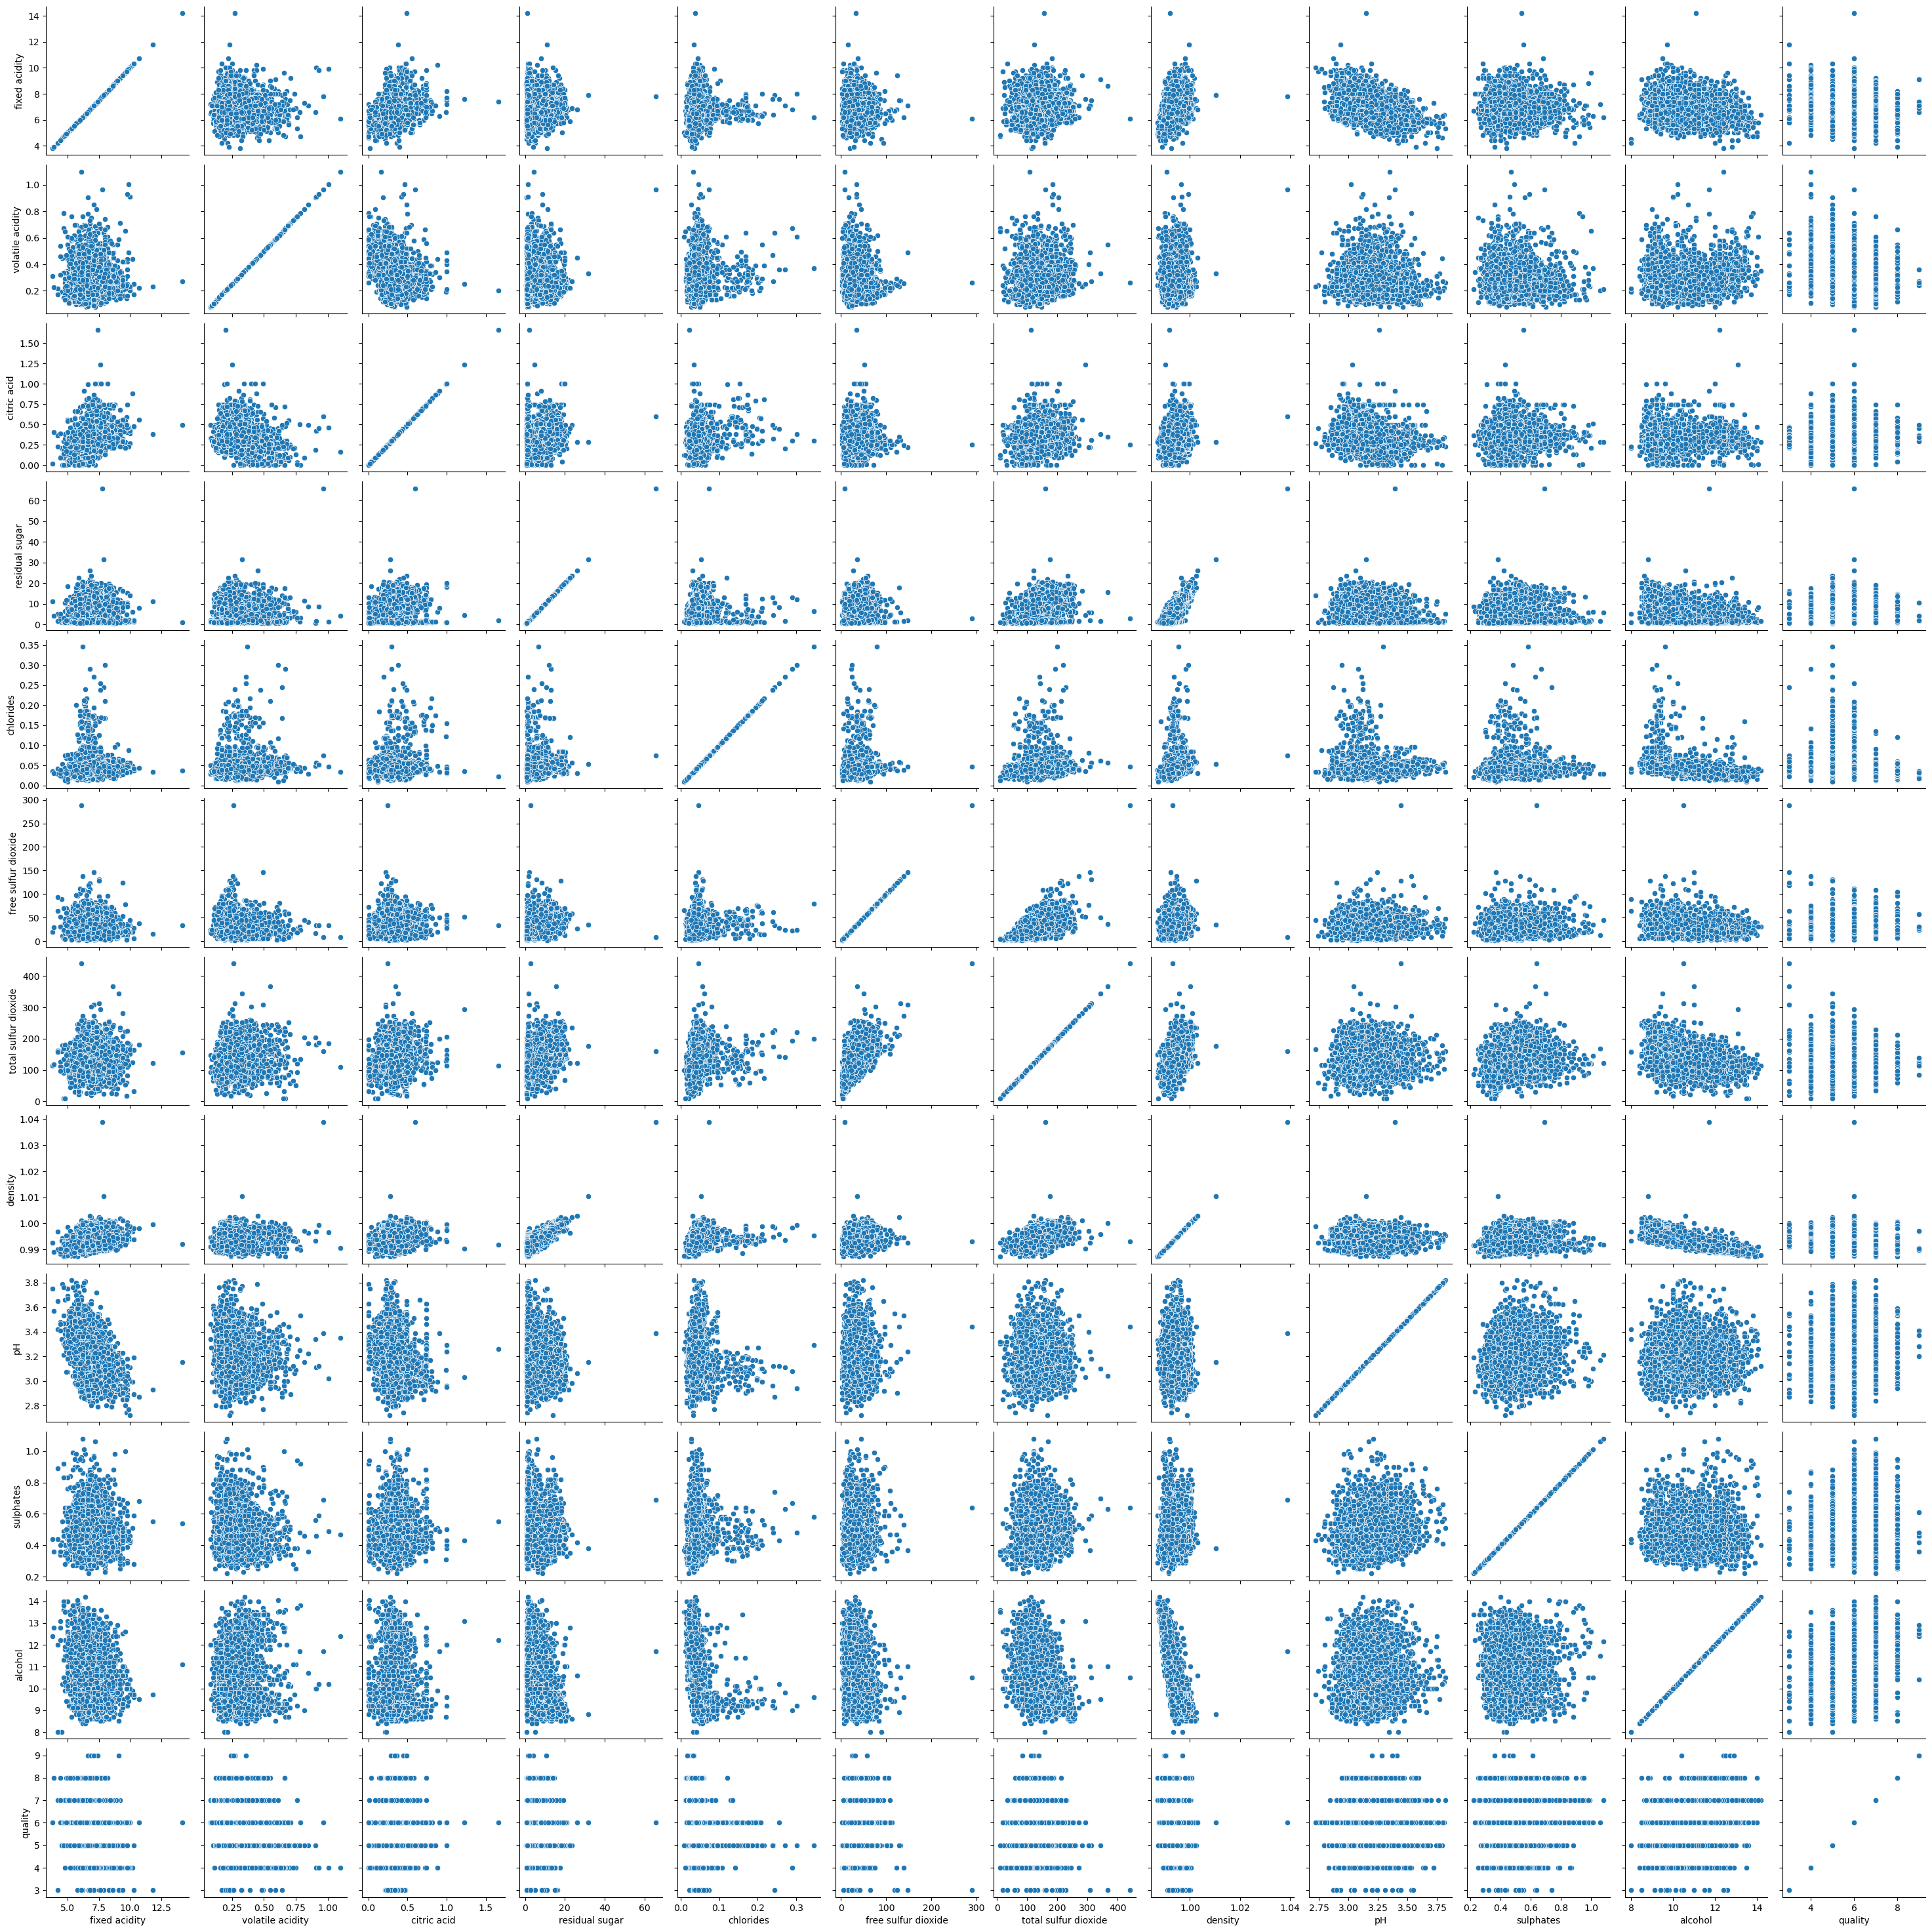

In [99]:
sns.pairplot(df, vars = df.columns, diag_kind = None)

When calculating correlation, I will actually separate train and test, but the purpose of doing this here is to test whether the data is suitable for homework. For this purpose, I made pairplot plots using the heatmap and seaborn library.

the correlation between variables to understand the relationship between different variables and identify important variables for modeling. Ideally, the correlation should be neither too high nor too low, and should be between 0.7 and -0.7. Some features had high correlation and the dataset had values outside this range, it was ideal for analysis. Let's continue!

## Multicollinearity Check

Here, I will start the analysis to create a model by separating it as train and test, first let's check multicollinearity!

In [41]:
X = df.drop(columns=df.columns[-1], axis=1) #I take all feature except quality feature for use in the model 
y = df[df.columns[-1]] #I take quality features as target of model(y). 

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)
#While seperating X to the train and test data set, I took the ratio as 0.2.
#Since I gave a random state, the analysis will not change in repeated studies.
coll_X_train=X_train.copy()

In [43]:
collR= round(coll_X_train.corr(),4)
#If we don't use the round() library, the corr() library outputs 6-valued numbers after the comma. 
#We can change it as we want with the round function I got 4 here.
collR

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
fixed acidity,1.0000,-0.0230,0.2936,0.1014,0.0183,-0.0538,0.0864,0.2743,-0.4352,-0.0203,-0.1174
volatile acidity,-0.0230,1.0000,-0.1613,0.0413,0.0703,-0.1047,0.0911,0.0031,-0.0317,-0.0374,0.0679
citric acid,0.2936,-0.1613,1.0000,0.0955,0.1049,0.0853,0.1191,0.1481,-0.1774,0.0663,-0.0753
residual sugar,0.1014,0.0413,0.0955,1.0000,0.0900,0.3021,0.4139,0.8375,-0.2125,-0.0174,-0.4724
chlorides,0.0183,0.0703,0.1049,0.0900,1.0000,0.1003,0.1962,0.2604,-0.0798,0.0128,-0.3617
free sulfur dioxide,-0.0538,-0.1047,0.0853,0.3021,0.1003,1.0000,0.6169,0.3021,-0.0016,0.0674,-0.2479
total sulfur dioxide,0.0864,0.0911,0.1191,0.4139,0.1962,0.6169,1.0000,0.5435,0.0051,0.1479,-0.4472
density,0.2743,0.0031,0.1481,0.8375,0.2604,0.3021,0.5435,1.0000,-0.1049,0.0791,-0.8070
pH,-0.4352,-0.0317,-0.1774,-0.2125,-0.0798,-0.0016,0.0051,-0.1049,1.0000,0.1579,0.1103
sulphates,-0.0203,-0.0374,0.0663,-0.0174,0.0128,0.0674,0.1479,0.0791,0.1579,1.0000,-0.0174


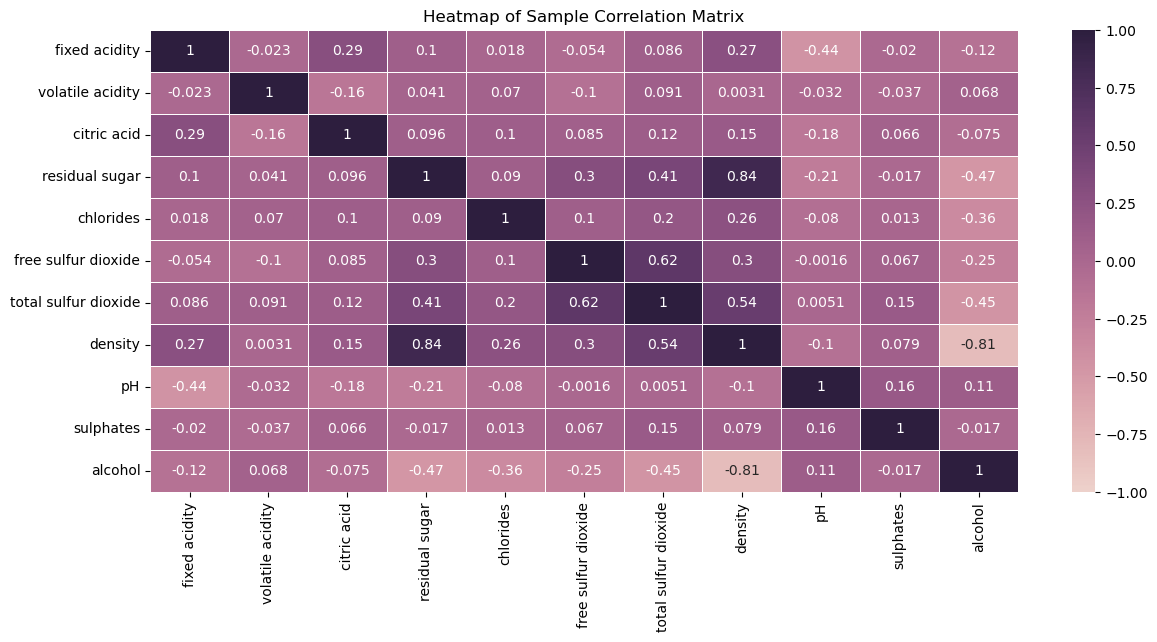

In [44]:
#heatmap of the correlation matrix so that we can see it more easily: 
plt.rcParams['figure.figsize'] = [14, 6]

sns.heatmap(collR,  cmap=sns.cubehelix_palette(as_cmap=True), annot=True, vmin=-1, vmax=1,linewidth=.5)
plt.title('Heatmap of Sample Correlation Matrix')
plt.show();

Some high and low correlations are observed after separating it into train and test set; There is a high correlation between residual_sugar and density, but a very low correlation between full teris alchol and density; I guess we'll have to delete the density data. We confirmed this later with the variance_inflation_factor() function.

In [45]:
coll_X_train["intercept"]=1 #Statsmodels libraries wants to add intercept column our dataset for check VIF

In [46]:
coll_X_train

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,intercept
3586,5.8,0.28,0.28,4.2,0.044,52.0,158.0,0.99200,3.35,0.44,10.7,1
2055,7.3,0.29,0.29,4.6,0.029,27.0,155.0,0.99310,3.07,0.26,10.6,1
2739,6.8,0.32,0.28,4.8,0.034,25.0,100.0,0.99026,3.08,0.47,12.4,1
3294,7.3,0.25,0.28,1.5,0.043,19.0,113.0,0.99338,3.38,0.56,10.1,1
2865,5.6,0.19,0.46,1.1,0.032,33.0,115.0,0.99090,3.36,0.50,10.4,1
...,...,...,...,...,...,...,...,...,...,...,...,...
664,7.1,0.17,0.38,7.4,0.052,49.0,182.0,0.99580,3.35,0.52,9.6,1
3276,6.6,0.23,0.30,4.6,0.060,29.0,154.0,0.99142,3.23,0.49,12.2,1
1318,6.4,0.15,0.31,1.1,0.044,25.0,96.0,0.99320,3.54,0.51,10.3,1
723,6.6,0.33,0.31,1.3,0.020,29.0,89.0,0.99035,3.26,0.44,12.4,1


###  Variance Inflation Factor (VIF)
The Variance Inflation Factor (VIF) is a method used to detect multicollinearity in a dataset. It works by taking each feature and regressing it against all of the other features in the dataset. The VIF value for each feature is then calculated based on the ratio of the variance of the feature's coefficients in this regression to the variance of a simple linear regression of that feature against all the other features. For each regression, the factor is calculated as :




 A high VIF value indicates that the feature is highly correlated with other features in the dataset, which can cause problems when building models. Therefore, a low VIF value is desirable, indicating that the feature is not strongly correlated with the other features in the dataset.

In [47]:
vif_df = pd.DataFrame() # create an empty data frame
vif_df["feature"] = coll_X_train.columns  # attach a column named feature which involves feature names of X df
vif_df["VIF"] = 0  #attach VIF column

for i in range(len(coll_X_train.columns)):

    vif_df.loc[i, 'VIF'] = round(variance_inflation_factor(coll_X_train.values, i),3)
vif_df

,feature,VIF
0,fixed acidity,3.362
1,volatile acidity,1.145
2,citric acid,1.171
3,residual sugar,16.398
4,chlorides,1.238
5,free sulfur dioxide,1.799
6,total sulfur dioxide,2.341
7,density,40.961
8,pH,2.525
9,sulphates,1.171


we see the VIF numbers of our columns above. If the VIF number is greater than 10, we should say that there is a definite correlation and remove that column; The fact that it is greater than five creates a problem. After each subtraction, we must calculate the VIF again and continue until the VIF value of the columns is less than 5.


As I mentioned above, since I am not sure about the dataset, I wrote a code below that controls this operation independently of the properties of the data; This code calculates the VIF value and if it is greater than 5, it drops the data and recalculates the vif depending on the user's approval:

In [48]:
drop_list=[]
while True:
    vif_df = pd.DataFrame() # create an empty data frame
    vif_df["feature"] = coll_X_train.columns  # attach a column named feature which involves feature names of X df
    vif_df["VIF"] = 0  #attach VIF column

    for i in range(len(coll_X_train.columns)):

        vif_df.loc[i, 'VIF'] = round(variance_inflation_factor(coll_X_train.values, i),3) #calculate VIF for each feature #ignore intercept row
    vif_df=vif_df.drop(index=(vif_df.shape[0]-1))
    a=vif_df.iloc[np.argmax(vif_df["VIF"])]
    print(a)
    if a.VIF>5:
        input_key=input("If you throw away dataset enter Q key on your keybord, else you can press other keys and drop operation will over:").lower()
        
        if input_key=="q":
            coll_X_train = coll_X_train.drop(columns=a.feature, axis=1)
            drop_list.append(a.feature)
        else:
            break
    else:
        break
    if len(coll_X_train.columns)<3:
        break

feature    density
VIF         40.961
Name: 7, dtype: object
If you throw away dataset enter Q key on your keybord, else you can press other keys and drop operation will over:q
feature    total sulfur dioxide
VIF                       2.189
Name: 6, dtype: object


In [49]:
drop_list

['density']

In [51]:
vif_df #to the recalculated VIF value after the above VIF-based column deletion operation

,feature,VIF
0,fixed acidity,1.369
1,volatile acidity,1.136
2,citric acid,1.167
3,residual sugar,1.488
4,chlorides,1.204
5,free sulfur dioxide,1.759
6,total sulfur dioxide,2.189
7,pH,1.357
8,sulphates,1.062
9,alcohol,1.674


In [52]:
X_new_train= coll_X_train.drop(columns="intercept", axis=1)
X_new_test=X_test.drop(columns=drop_list, axis=1)

In [57]:
#As you can see, the column with high correlation is missing from the X_new_train variable:
print(X_new_train.shape, X_new_test.shape, X_train.shape, X_test.shape)
print("Columns of X before dropping operation ",X_train.columns)
print("Columns of X after dropping operation ",X_new_train.columns)
#For wine-quality-white dataset, wee see density column is dropped X_new_train dataset

(3918, 10) (980, 10) (3918, 11) (980, 11)
Columns of X before dropping operation  Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol'],
      dtype='object')
Columns of X after dropping operation  Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'pH',
       'sulphates', 'alcohol'],
      dtype='object')


In [58]:
X_train

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
3586,5.8,0.28,0.28,4.2,0.044,52.0,158.0,0.99200,3.35,0.44,10.7
2055,7.3,0.29,0.29,4.6,0.029,27.0,155.0,0.99310,3.07,0.26,10.6
2739,6.8,0.32,0.28,4.8,0.034,25.0,100.0,0.99026,3.08,0.47,12.4
3294,7.3,0.25,0.28,1.5,0.043,19.0,113.0,0.99338,3.38,0.56,10.1
2865,5.6,0.19,0.46,1.1,0.032,33.0,115.0,0.99090,3.36,0.50,10.4
...,...,...,...,...,...,...,...,...,...,...,...
664,7.1,0.17,0.38,7.4,0.052,49.0,182.0,0.99580,3.35,0.52,9.6
3276,6.6,0.23,0.30,4.6,0.060,29.0,154.0,0.99142,3.23,0.49,12.2
1318,6.4,0.15,0.31,1.1,0.044,25.0,96.0,0.99320,3.54,0.51,10.3
723,6.6,0.33,0.31,1.3,0.020,29.0,89.0,0.99035,3.26,0.44,12.4


In [59]:
X_new_train

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,pH,sulphates,alcohol
3586,5.8,0.28,0.28,4.2,0.044,52.0,158.0,3.35,0.44,10.7
2055,7.3,0.29,0.29,4.6,0.029,27.0,155.0,3.07,0.26,10.6
2739,6.8,0.32,0.28,4.8,0.034,25.0,100.0,3.08,0.47,12.4
3294,7.3,0.25,0.28,1.5,0.043,19.0,113.0,3.38,0.56,10.1
2865,5.6,0.19,0.46,1.1,0.032,33.0,115.0,3.36,0.50,10.4
...,...,...,...,...,...,...,...,...,...,...
664,7.1,0.17,0.38,7.4,0.052,49.0,182.0,3.35,0.52,9.6
3276,6.6,0.23,0.30,4.6,0.060,29.0,154.0,3.23,0.49,12.2
1318,6.4,0.15,0.31,1.1,0.044,25.0,96.0,3.54,0.51,10.3
723,6.6,0.33,0.31,1.3,0.020,29.0,89.0,3.26,0.44,12.4


After feature extraction by performing VIF control, our dataset does not observe volatile correlations.

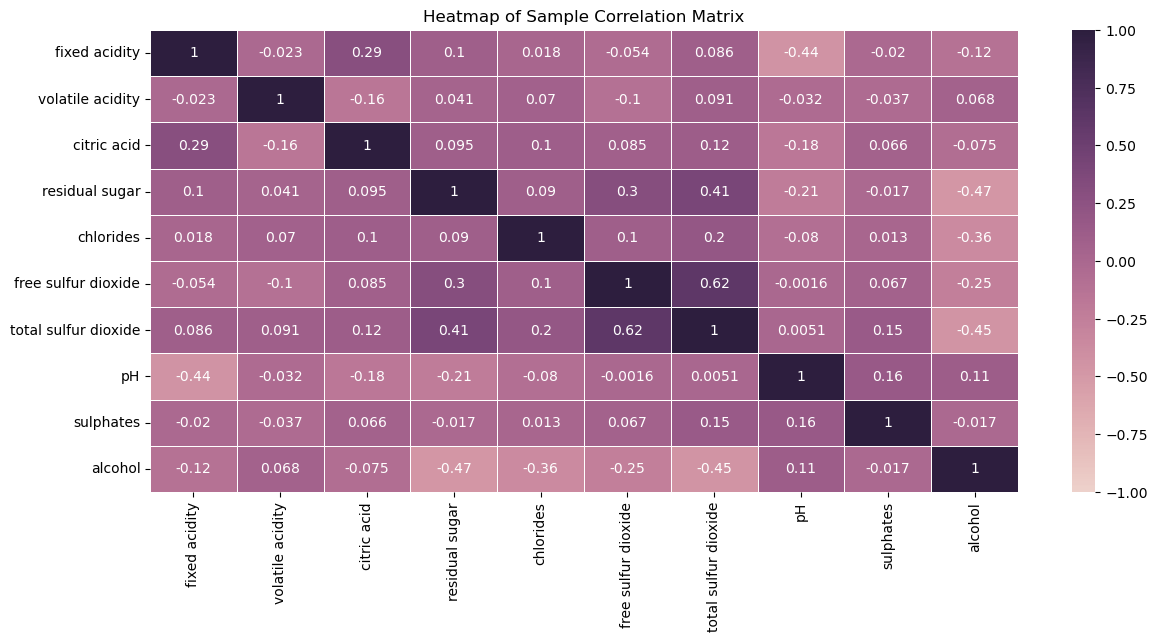

In [71]:
plt.rcParams['figure.figsize'] = [14, 6]

sns.heatmap(X_new_train.corr(),  cmap=sns.cubehelix_palette(as_cmap=True), annot=True, vmin=-1, vmax=1,linewidth=.5)
plt.title('Heatmap of Sample Correlation Matrix')
plt.show();

In [66]:
lr = LinearRegression()
lr.fit(X_train, y_train)
y_test_pred = lr.predict(X_test)

# with feature selection
lr_fs = LinearRegression()
lr_fs.fit(X_new_train, y_train)
new_y_test_pred = lr_fs.predict(X_new_test)

In [61]:
from sklearn.metrics import mean_squared_error, r2_score

print('Test set (without feature selection) mean squared error: %.2f'
      % mean_squared_error(y_test,y_test_pred))
print('Test (without feature selection) R2: %.4f'
      % r2_score(y_test, y_test_pred))

Test set (without feature selection) mean squared error: 0.62
Test (without feature selection) R2: 0.2197


In [116]:
from sklearn.metrics import mean_squared_error, r2_score

print('Test set (with feature selection) mean squared error: %.2f'
      % mean_squared_error(y_test, new_y_test_pred))
print('Test (with feature selection) R2: %.4f'
      % r2_score(y_test, new_y_test_pred))

Test set (with feature selection) mean squared error: 0.60
Test (with feature selection) R2: 0.2442


## Feature Selection

- Apply feature selection algorihtms here and come up with a final model here.

In [138]:
X_train_cfs=X_new_train.copy() 
X_test_cfs= X_new_test.copy()
regr = LinearRegression()

In [139]:
X_train_cfs.shape

(3918, 10)

In [140]:
from sklearn import metrics
#get to know sklearn metrics; Negative mse metric is defined instead of mse in sklearn
metrics.get_scorer_names() 

['accuracy',
 'adjusted_mutual_info_score',
 'adjusted_rand_score',
 'average_precision',
 'balanced_accuracy',
 'completeness_score',
 'explained_variance',
 'f1',
 'f1_macro',
 'f1_micro',
 'f1_samples',
 'f1_weighted',
 'fowlkes_mallows_score',
 'homogeneity_score',
 'jaccard',
 'jaccard_macro',
 'jaccard_micro',
 'jaccard_samples',
 'jaccard_weighted',
 'matthews_corrcoef',
 'max_error',
 'mutual_info_score',
 'neg_brier_score',
 'neg_log_loss',
 'neg_mean_absolute_error',
 'neg_mean_absolute_percentage_error',
 'neg_mean_gamma_deviance',
 'neg_mean_poisson_deviance',
 'neg_mean_squared_error',
 'neg_mean_squared_log_error',
 'neg_median_absolute_error',
 'neg_negative_likelihood_ratio',
 'neg_root_mean_squared_error',
 'normalized_mutual_info_score',
 'positive_likelihood_ratio',
 'precision',
 'precision_macro',
 'precision_micro',
 'precision_samples',
 'precision_weighted',
 'r2',
 'rand_score',
 'recall',
 'recall_macro',
 'recall_micro',
 'recall_samples',
 'recall_weighted',

While selecting the feature, I wanted to make an observation with the graph as you did in the lesson in order to see the best selection, but I wanted to make an mse besides the r2 score in order not to copy the one in the lesson directly. Since mse is not defined in sklearn, I took the negative one and multiplied by -1 and plotted both scores.

The SequentialFeatureSelector function in the mlxtend library takes estimator, k_features, forward, scoring, and cv features as parameters. The k_features property takes the number of parameters to select. We can give a range to this feature in the mlxtend library, and if we choose this value range from 1 as the number of X columns, we can observe the best choice depending on the score we choose.

actually there is also the sklearn library with the same feature and the same name, but the k_features property only takes numbers. I think it makes more sense to use the mlxtend library to graph the entire score and then select the best case.

In [141]:
sbs_r2 = SFS(regr, k_features=(1,len(X_train_cfs.columns)), forward=False, floating=False, scoring="r2",cv=None)
sbs_mse=SFS(regr, k_features=(1,len(X_train_cfs.columns)), forward=False, floating=False, scoring="neg_mean_squared_error",cv=None)


In [142]:
sbs_r2.fit(X_train_cfs, y_train)
sbs_mse.fit(X_train_cfs,y_train)

SequentialFeatureSelector(cv=None, estimator=LinearRegression(), forward=False,
                          k_features=(1, 10), scoring='neg_mean_squared_error')

In [143]:
sbs_mse.subsets_ #return dictionary which contains a lot of important information

{10: {'feature_idx': (0, 1, 2, 3, 4, 5, 6, 7, 8, 9),
  'cv_scores': array([-0.5630192]),
  'avg_score': -0.5630191984264526,
  'feature_names': ('fixed acidity',
   'volatile acidity',
   'citric acid',
   'residual sugar',
   'chlorides',
   'free sulfur dioxide',
   'total sulfur dioxide',
   'pH',
   'sulphates',
   'alcohol')},
 9: {'feature_idx': (0, 1, 3, 4, 5, 6, 7, 8, 9),
  'cv_scores': array([-0.56303627]),
  'avg_score': -0.5630362746663498,
  'feature_names': ('fixed acidity',
   'volatile acidity',
   'residual sugar',
   'chlorides',
   'free sulfur dioxide',
   'total sulfur dioxide',
   'pH',
   'sulphates',
   'alcohol')},
 8: {'feature_idx': (0, 1, 3, 5, 6, 7, 8, 9),
  'cv_scores': array([-0.56329076]),
  'avg_score': -0.5632907596400955,
  'feature_names': ('fixed acidity',
   'volatile acidity',
   'residual sugar',
   'free sulfur dioxide',
   'total sulfur dioxide',
   'pH',
   'sulphates',
   'alcohol')},
 7: {'feature_idx': (0, 1, 3, 5, 6, 8, 9),
  'cv_scores': a

In [144]:
from sklearn import metrics

mse_train_list=[]
mse_test_list=[]
for i in sbs_mse.subsets_:
#Returns the value range we give to k features and selects features as many as the number of values.
    mse_train_list.append(-1*sbs_mse.subsets_[i]["avg_score"]) 
    #The average score returns a negative mse value.
    X_try_train=X_train_cfs[list(sbs_mse.subsets_[i]["feature_names"])]
    X_try_test=X_test_cfs[list(sbs_mse.subsets_[i]["feature_names"])]    
    model_forselect=LinearRegression()
    model_forselect.fit(X_try_train,y_train)
    mse_test_list.append(metrics.mean_squared_error(model_forselect.predict(X_try_test), y_test))


In [145]:
r2_train_list=[]
r2_test_list=[]

for i in sbs_r2.subsets_:
    r2_train_list.append(sbs_r2.subsets_[i]["avg_score"])
    #The average score returns a r2 value.
    X_try_train=X_train_cfs[list(sbs_r2.subsets_[i]["feature_names"])]
    X_try_test=X_test_cfs[list(sbs_r2.subsets_[i]["feature_names"])]    
    model_forselect=LinearRegression()
    model_forselect.fit(X_try_train,y_train)
    r2_test_list.append(model_forselect.score( X_try_test, y_test))
    

<Figure size 1400x600 with 0 Axes>

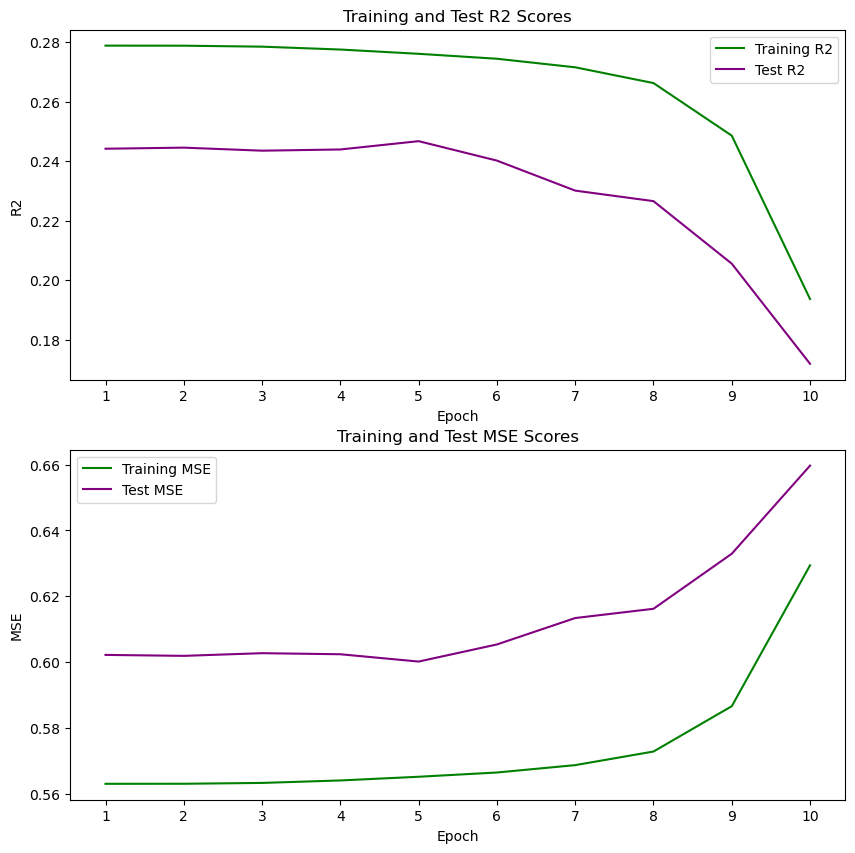

In [146]:
fig = plt.figure()
fig = plt.figure(figsize=(10, 10))
ax1 = fig.add_subplot(2, 1, 1)
ax1.plot(range(1,len(r2_train_list)+1), r2_train_list, color='green', label='Training R2')
ax1.plot(range(1,len(r2_train_list)+1), r2_test_list, color='purple', label='Test R2')
ax1.set_xlabel('Epoch')
ax1.set_ylabel('R2')
ax1.set_title('Training and Test R2 Scores')
ax1.set_xticks(range(1, len(r2_train_list)+1))
ax1.legend()
ax2 = fig.add_subplot(2, 1, 2)
ax2.plot(range(1,len(mse_train_list)+1), mse_train_list, color='green', label='Training MSE')
ax2.plot(range(1,len(mse_train_list)+1), mse_test_list, color='purple', label='Test MSE')
ax2.set_xlabel('Epoch')
ax2.set_ylabel('MSE')
ax2.set_title('Training and Test MSE Scores')
ax2.set_xticks(range(1, len(mse_train_list)+1))
ax2.legend()
plt.show()


By looking at the graphs, we can choose the number of parameters that will be best for our model.

---
SequentialFeatureSelector from Sklearn Library

In [166]:

regr = LinearRegression()
sfs = SequentialFeatureSelector(regr,n_features_to_select=5, direction='backward',scoring="r2")
sfs.fit(X_train_cfs,y_train)

SequentialFeatureSelector(direction='backward', estimator=LinearRegression(),
                          n_features_to_select=5, scoring='r2')

In [167]:
sfs.set_params()

SequentialFeatureSelector(direction='backward', estimator=LinearRegression(),
                          n_features_to_select=5, scoring='r2')

In [168]:
sfs.get_params()

{'cv': 5,
 'direction': 'backward',
 'estimator__copy_X': True,
 'estimator__fit_intercept': True,
 'estimator__n_jobs': None,
 'estimator__positive': False,
 'estimator': LinearRegression(),
 'n_features_to_select': 5,
 'n_jobs': None,
 'scoring': 'r2',
 'tol': None}

In [169]:
sfs.get_feature_names_out()

array(['fixed acidity', 'volatile acidity', 'residual sugar',
       'free sulfur dioxide', 'alcohol'], dtype=object)

---
ExhaustiveFeatureSelector from Mlxtend Library

---

In [170]:
efs = EFS(regr, 
          min_features=5, #play with this parameter
          max_features=5, #play with this parameter
          scoring='r2',
          print_progress=True,
          cv=None) #cv for better generalization

efs.fit(X_train_cfs, y_train)           

print('Best R2 score on training data with best subset of size 4: %.2f' % efs.best_score_)
print('Best subset (column names):', efs.best_feature_names_)
print('Best subset index:', efs.best_idx_)

Features: 6/6

Best R2 score on training data with best subset of size 4: 0.27
Best subset (column names): ('fixed acidity', 'volatile acidity', 'residual sugar', 'free sulfur dioxide', 'alcohol')
Best subset index: (0, 1, 2, 3, 5)


In [171]:
X_train.shape

(3918, 11)

In [172]:
X_new_test.shape

(980, 10)

In [173]:
X_train_cfs=X_new_train[list(sbs_r2.subsets_[5]["feature_names"])]
X_test_cfs=X_new_test[list(sbs_r2.subsets_[5]["feature_names"])]
X_train_cfs.shape

(3918, 5)

## Conclusion

In most cases, we can get much better results when we do not give the values in our dataset directly to the model and analyze it; We observed that it would be more beneficial for the dataset to remove one of these data, especially if the correlation between the data in the given dataset is very high or very low. A high correlation causes wrong results by increasing the linear dependence of the variables with each other. Therefore, it is important to exclude data with high correlation from the data. Likewise, low correlation creates a problem in our model.

Feature selection is a data preprocessing technique used to reduce the number of features in the data set and improve the performance of the model by removing redundant or repetitive features. This reduces the complexity of the model, prevents overfitting, improves generalization performance, creates more understandable models, and can shorten model training time, and can be a savior in large-scale problems by ensuring that we don't keep unnecessary features in our dataset.

When we look at these situations, we first performed the analysis with the dataset we have. We had two columns that were connected to each other. We checked our dataset with VIF and saw that the density of these two columns was very high, and we removed it from the dataset. Afterwards, we made a feature selection among our remaining features and printed each parameter value with two different metrics. When we looked at the metrics, we decided that the 5 parameter selection was the most correct. We trained the dataset directly, by extracting features with the VIF control, and by training three different cases as a result of feature selection. I used logistic regression in the last training because I think we can make our observations more easily in this way, otherwise it is difficult to observe the change because the score is at 0.2. As a result, we observed that our model gave the best score as a result of the feature selection we made.

In [174]:
model_all_data=LogisticRegression()
model_all_data.fit(X_train,y_train)

C:\Users\Asus\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [175]:
model_no_corr=LogisticRegression()
model_no_corr.fit(X_new_train,y_train)

C:\Users\Asus\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [176]:
end_model=LogisticRegression()
end_model.fit(X_train_cfs,y_train)

C:\Users\Asus\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [177]:
print(model_all_data.score( X_train, y_train))
print(model_no_corr.score( X_new_train, y_train))
print(end_model.score(X_train_cfs, y_train))

0.4719244512506381
0.4686064318529862
0.4780500255232261


In [178]:
print(model_all_data.score( X_test, y_test))
print(model_no_corr.score( X_new_test, y_test))
print(end_model.score(X_test_cfs, y_test))

0.4775510204081633
0.4816326530612245
0.49081632653061225


In [160]:
import session_info
session_info.show()